In [1]:
import numpy as np
import matplotlib.pyplot as plt

import optimal_transport.apdamd.ot
from optimal_transport.greenkhorn.ot import OT as greenkhorn
from optimal_transport.sinkhorn.ot import OT as sinkhorn
from optimal_transport.apdamd.ot import OT as apdamd
from optimal_transport.tests.sample_problem import sample_gaussian_OT_exact, simple_problem
from optimal_transport.ot import cost
import timeit

In [2]:
# Create the problem
n = 1  # dim
Gaussian1 = (np.zeros(n), np.eye(n))
Gaussian2 = (np.ones(n), np.eye(n) + np.triu(np.ones(n)) * 0.5)

In [175]:
res = np.load('./run_2.npz', allow_pickle=True)
epss = list(res['timings_greenkhorn'][()].keys())
print(epss)

[0.06, 0.07333333333333333, 0.08666666666666667, 0.1, 0.11333333333333334, 0.12666666666666665, 0.14, 0.15333333333333332, 0.16666666666666669, 0.18, 0.19333333333333333, 0.20666666666666667, 0.22, 0.23333333333333334, 0.24666666666666667, 0.26, 0.2733333333333333, 0.2866666666666667, 0.30000000000000004, 0.31333333333333335, 0.32666666666666666, 0.34, 0.35333333333333333, 0.3666666666666667, 0.38, 0.39333333333333337, 0.4066666666666667, 0.42000000000000004, 0.43333333333333335, 0.4466666666666667, 0.46, 0.4733333333333334, 0.4866666666666667, 0.5]


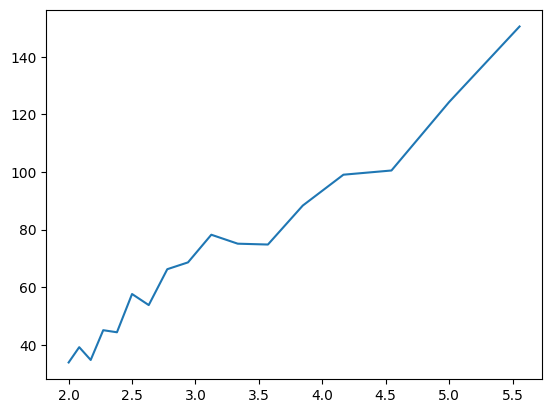

In [162]:
# timings apdamd
plt.plot(1/np.array(epss), np.array([res['timings_apdamd'][()][eps] for eps in epss]), label='apdamd')
plt.savefig('timings_apdamd.png')

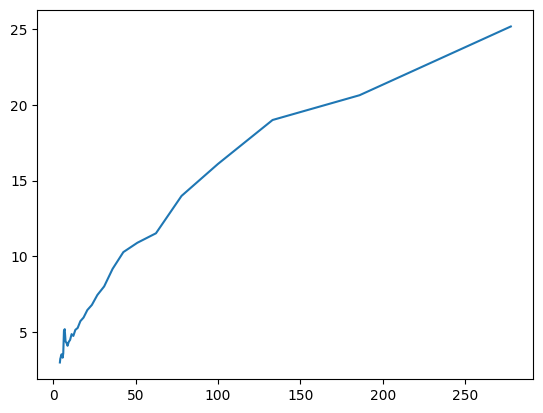

In [182]:
# timings greenkhorn
plt.plot(1/np.array(epss)**2, np.array([res['timings_greenkhorn'][()][eps] for eps in epss]), label='greenkhorn')
plt.savefig('timings_greenkhorn.png')

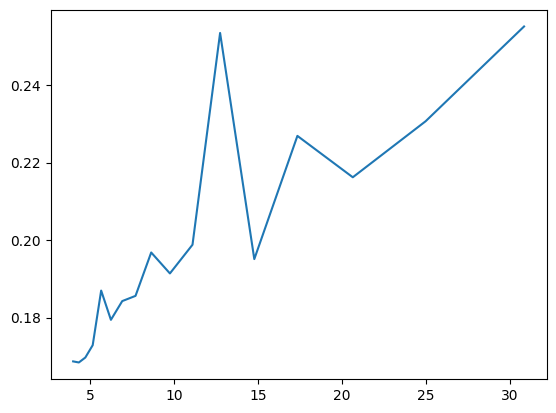

In [164]:
# timings sinkhorn
plt.plot(1/np.array(epss)**2, np.array([res['timings_sinkhorn'][()][eps] for eps in epss]), label='sinkhorn')
plt.savefig('timings_sinkhorn.png')

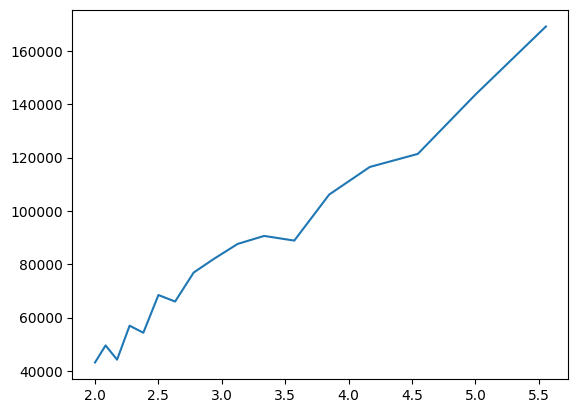

In [174]:
# iters apdamd
plt.plot(1/np.array(epss)**1.0, np.array([res['realised_iters_apdamd'][()][eps] for eps in epss]), label='apdamd')
plt.savefig('realised_iters_apdamd.png')

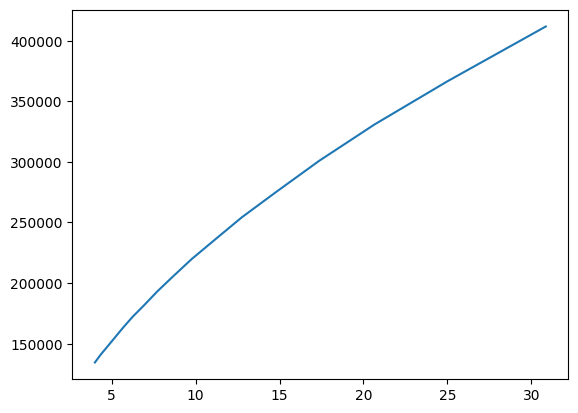

In [166]:
# iters greenkhorn
plt.plot(1/np.array(epss)**2, np.array([res['realised_iters_greenkhorn'][()][eps] for eps in epss]), label='greenkhorn')
plt.savefig('realised_iters_greenkhorn.png')

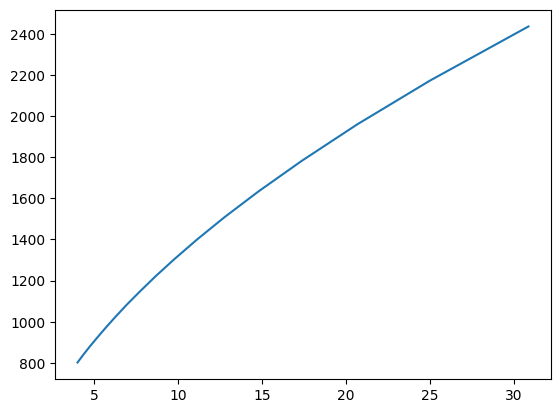

In [167]:
# iters greenkhorn
plt.plot(1/np.array(epss)**2, np.array([res['realised_iters_sinkhorn'][()][eps] for eps in epss]), label='sinkhorn')
plt.savefig('realised_iters_sinkhorn.png')